# Data Exploration

Imports:

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, f1_score

import re # Regular expression 
from langdetect import detect #Language detection

Loading file:

In [49]:
df = pd.read_csv("total_data.csv")

Dataframe description:

In [50]:
df.describe(include='all')

,id,likes,following,followers,posts_amount,celeb,pic_vid,hashtag,hashtag_amount,pCo,content,post_date,curr_date,predict
count,11113,1.036500e+04,10509.000000,1.050900e+04,10509.000000,11113.000000,11113.000000,9263,11113.000000,10481,11088,11111,11113,9808.000000
unique,10249,NaN,NaN,NaN,NaN,NaN,NaN,8122,NaN,8342,9554,215,22,NaN
top,Cd3IHD_KmBW,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,text,,1h,06/06/2022,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,139,NaN,179,606,1205,1141,NaN
mean,NaN,9.717736e+03,1201.794081,8.093296e+04,1334.813113,0.027535,0.172861,NaN,16.945559,NaN,NaN,NaN,NaN,0.133666
std,NaN,2.466031e+05,1674.326973,3.297725e+05,2775.201195,0.163645,0.378144,NaN,11.433369,NaN,NaN,NaN,NaN,0.340311
min,NaN,2.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2.110000e+02,181.000000,4.154000e+03,194.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,5.780000e+02,587.000000,1.450000e+04,524.000000,0.000000,0.000000,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,1.924000e+03,1344.000000,5.490000e+04,1366.000000,0.000000,0.000000,NaN,28.000000,NaN,NaN,NaN,NaN,0.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11113 non-null  object 
 1   likes           10365 non-null  float64
 2   following       10509 non-null  float64
 3   followers       10509 non-null  float64
 4   posts_amount    10509 non-null  float64
 5   celeb           11113 non-null  int64  
 6   pic_vid         11113 non-null  int64  
 7   hashtag         9263 non-null   object 
 8   hashtag_amount  11113 non-null  int64  
 9   pCo             10481 non-null  object 
 10  content         11088 non-null  object 
 11  post_date       11111 non-null  object 
 12  curr_date       11113 non-null  object 
 13  predict         9808 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [52]:
df.columns

Index(['id', 'likes', 'following', 'followers', 'posts_amount', 'celeb',
       'pic_vid', 'hashtag', 'hashtag_amount', 'pCo', 'content', 'post_date',
       'curr_date', 'predict'],
      dtype='object')

In [53]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
0,407.0,867.0,32400.0,792.0,0,1,2,0.0
1,697.0,450.0,40600.0,125.0,0,0,0,0.0
2,928.0,234.0,5910.0,105.0,0,0,0,0.0
3,22607.0,6.0,166000.0,2124.0,0,0,0,0.0
4,1239.0,676.0,6542.0,40.0,0,0,6,0.0
...,...,...,...,...,...,...,...,...
11108,700.0,2.0,4872.0,1047.0,0,0,0,0.0
11109,4202.0,257.0,33000.0,407.0,0,1,28,0.0
11110,445.0,92.0,26100.0,80.0,0,1,14,0.0
11111,1514.0,1.0,919000.0,2608.0,0,0,22,0.0


Data clean:

In [54]:
df.shape

(11113, 14)

In [55]:
df.drop_duplicates("id",keep='last', inplace=True)

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(7259, 14)

In [58]:
df['predict'].value_counts()

0.0    6448
1.0     811
Name: predict, dtype: int64

As we can see, we don't have much successful posts, so we need to manipulate the data manually:

In [59]:
# changing the definition of success
#   for w we will check for 0.3 likes/followers ratio
#   for d we will check for 0.25 likes/followers ratio
#   for h we will check for 0.2 likes/followers ratio
#   for m we will check for 0.15 likes/followers ratio
for index,row in df.iterrows():
        if 'd' in row['content']:
            if row['likes']/row['followers'] > 0.20:
                df.at[index,'predict'] = 1

        elif 'h' in row['content']:
            if row['likes']/row['followers'] > 0.15:
                df.at[index,'predict'] = 1

        elif 'm' in row['content']:
            if row['likes']/row['followers'] > 0.10:
                df.at[index,'predict'] = 1

In [60]:
df['predict'].value_counts()

0.0    6038
1.0    1221
Name: predict, dtype: int64

In [61]:
# we will duplicate the rows with prediction '1' to balance with '0'
df_duplicate = df.copy()
for i in range(1,3):
    for index, row in df.iterrows():
        if row['predict'] == 1:
            df_duplicate = df_duplicate.append(row)
            #df_duplicate = pd.concat([df_duplicate, row], ignore_index=True)
df_duplicate.shape

C:\Users\orenp\AppData\Local\Temp\ipykernel_40288\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_40288\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_40288\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ipykernel_40288\459244002.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicate = df_duplicate.append(row)
C:\Users\orenp\AppData\Local\Temp\ip

(9701, 14)

In [62]:
df_duplicate['predict'].value_counts()

0.0    6038
1.0    3663
Name: predict, dtype: int64

Now we will start with the EDA

let's see if we have correlations between the columns:

In [63]:
df_dup_numeric = df_duplicate.select_dtypes(include='number')
df_dup_numeric

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
0,407.0,867.0,32400.0,792.0,0,1,2,0.0
10,609.0,82.0,35500.0,809.0,0,0,8,0.0
13,27418.0,70.0,53000.0,789.0,0,0,30,1.0
14,881.0,302.0,17600.0,291.0,0,0,8,0.0
19,252.0,1018.0,263000.0,11950.0,0,0,22,0.0
...,...,...,...,...,...,...,...,...
11060,67499.0,178.0,66300.0,591.0,0,1,20,1.0
11063,8001.0,3123.0,1783.0,268.0,0,1,30,1.0
11064,19683.0,3123.0,1783.0,268.0,0,1,30,1.0
11083,13207.0,91.0,40700.0,69.0,0,1,30,1.0


In [64]:
corr = df_dup_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,likes,following,followers,posts_amount,celeb,pic_vid,hashtag_amount,predict
likes,1.000000,-0.018779,0.085330,-0.001886,0.012933,0.193271,-0.011490,0.155169
following,-0.018779,1.000000,-0.053134,0.099471,-0.015527,-0.100898,0.074442,-0.169520
followers,0.085330,-0.053134,1.000000,0.308375,0.259296,0.081373,-0.091661,-0.132622
posts_amount,-0.001886,0.099471,0.308375,1.000000,0.153664,0.013666,-0.070149,-0.169075
celeb,0.012933,-0.015527,0.259296,0.153664,1.000000,0.016615,-0.152089,-0.063285
pic_vid,0.193271,-0.100898,0.081373,0.013666,0.016615,1.000000,-0.043210,0.333685
hashtag_amount,-0.011490,0.074442,-0.091661,-0.070149,-0.152089,-0.043210,1.000000,0.017297
predict,0.155169,-0.169520,-0.132622,-0.169075,-0.063285,0.333685,0.017297,1.000000


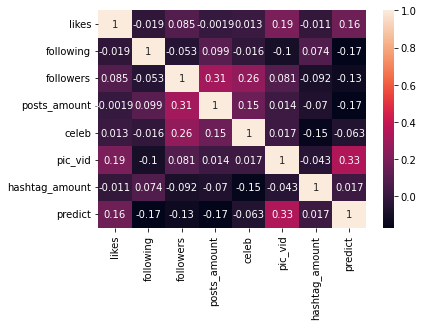

In [65]:
# plot the correlation matrix
sns.heatmap(df_dup_numeric.corr(), annot=True)
plt.show()

([<matplotlib.patches.Wedge at 0x1de5998ce50>,
 [Text(-0.412669031982113, 1.0196588988691002, 'No'),
  Text(0.4126690319821134, -1.0196588988691, 'Yes')],
 [Text(-0.22509219926297072, 0.5561775812013273, '62.2%'),
  Text(0.22509219926297092, -0.5561775812013272, '37.8%')])

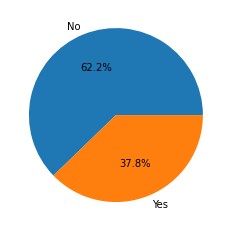

In [66]:
plt.pie(df_dup_numeric['predict'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')

In [86]:
df_dup_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9701 entries, 0 to 9700
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   likes           9701 non-null   float64
 1   following       9701 non-null   float64
 2   followers       9701 non-null   float64
 3   posts_amount    9701 non-null   float64
 4   celeb           9701 non-null   int64  
 5   pic_vid         9701 non-null   int64  
 6   hashtag_amount  9701 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 530.6 KB


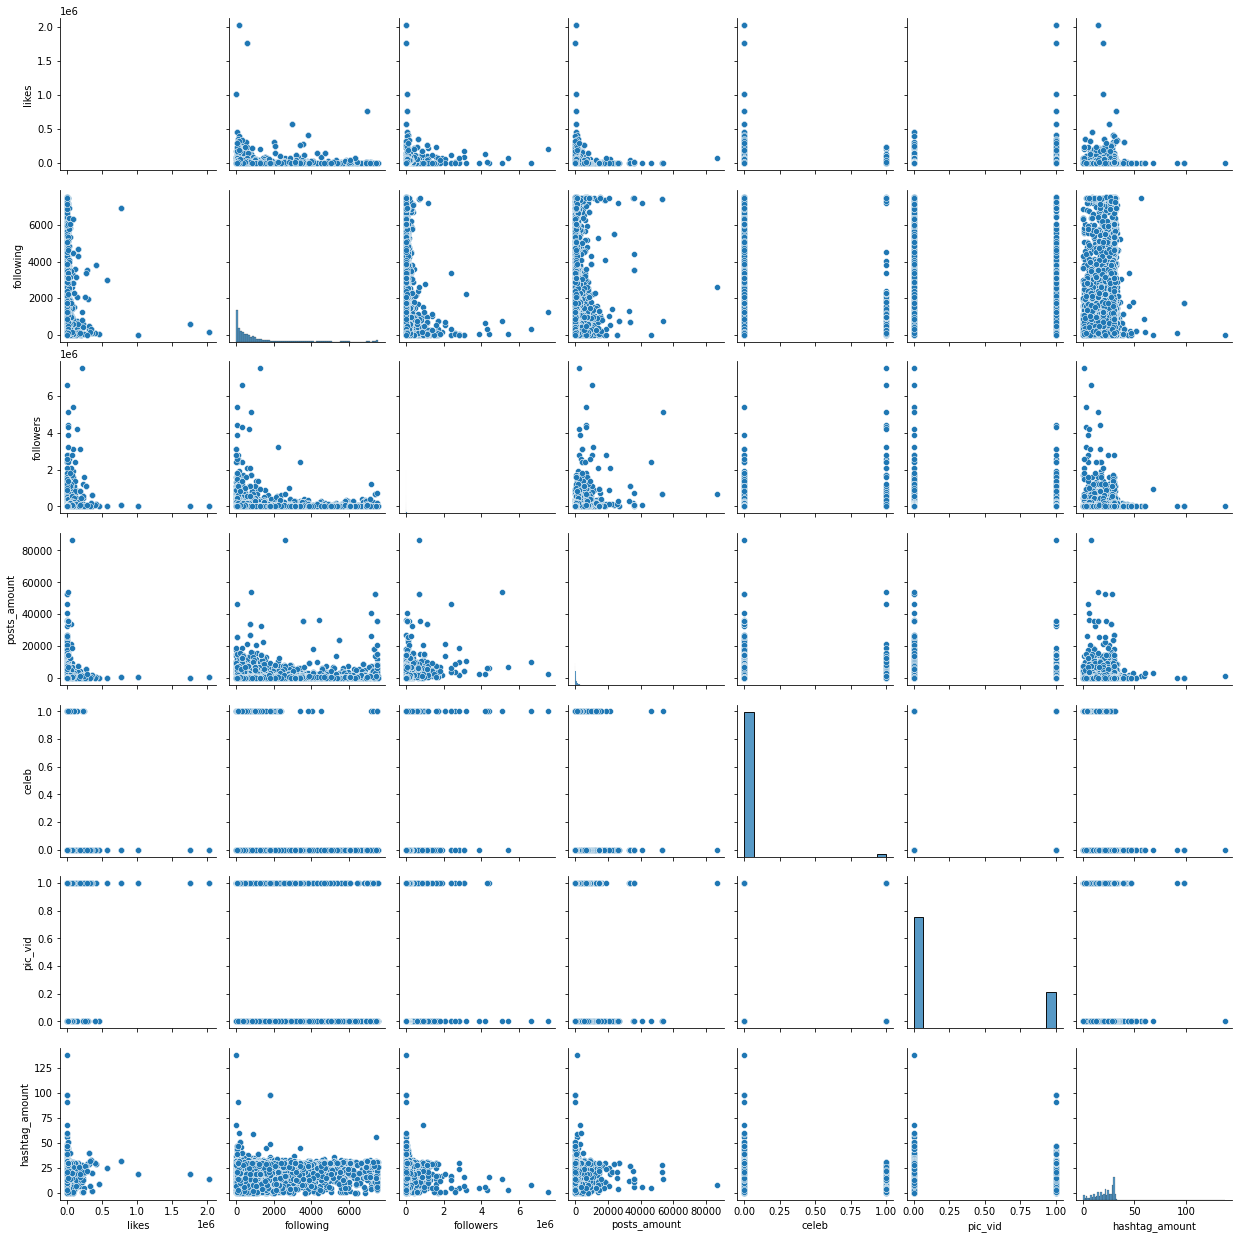

In [87]:
sns.pairplot(df_dup_numeric) 

<AxesSubplot:xlabel='posts_amount', ylabel='followers'>

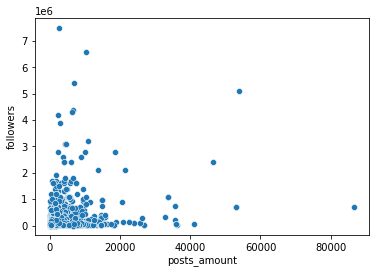

In [92]:
sns.scatterplot(data=df_dup_numeric, x="posts_amount", y="followers")

<AxesSubplot:xlabel='celeb', ylabel='followers'>

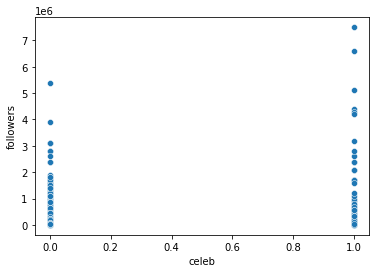

In [93]:
sns.scatterplot(data=df_dup_numeric, x="celeb", y="followers")

<AxesSubplot:xlabel='likes', ylabel='pic_vid'>

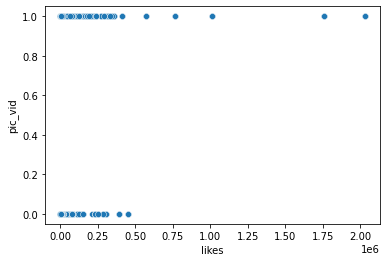

In [94]:
sns.scatterplot(data=df_dup_numeric, x="likes", y="pic_vid")

<AxesSubplot:xlabel='likes', ylabel='followers'>

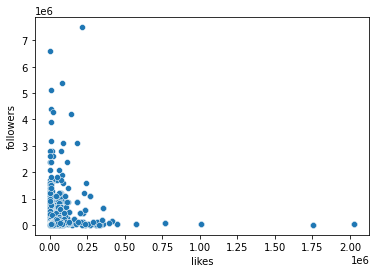

In [95]:
sns.scatterplot(data=df_dup_numeric, x="likes", y="followers")

<AxesSubplot:xlabel='posts_amount', ylabel='celeb'>

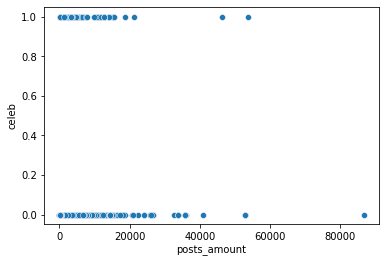

In [96]:
sns.scatterplot(data=df_dup_numeric, x="posts_amount", y="celeb")

Split the data to train and test

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_dup_numeric, 
                                                    df_dup_numeric['likes'], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [111]:
# standard scaler
standard_scaler = StandardScaler()
X_train_stand_scaled = standard_scaler.fit_transform(X_train)
X_test_stand_scaled = standard_scaler.fit_transform(X_test)

In [113]:
model_stand = LogisticRegression(random_state=0).fit(X_train_stand_scaled, y_train)
y_predict_stand = model_stand.predict(X_test)
standard_score = f1_score(y_test, y_predict_stand)
print("standard score: %.2f" % standard_score)

In [ ]:
y_pred = model_stand.predict(X_test)
redDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(redDF)

In [ ]:
model_stand.predict(X_test)

In [ ]:
# measure of the test's accuracy and precision
f1_score(y_test, y_pred)

In [ ]:
# the score means that the the two variables are perfectly correlated if 100%
r2_score(y_test, y_pred)

Now we will do some text exploration